In [16]:
import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np 

from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_confusion_matrix

import cv2

import tensorflow as tf 
import keras
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data = pd.read_csv('D:\\ML\\challenges-in-representation-learning-facial-expression-recognition-challenge\\icml_face_data.csv')

In [3]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
emotions = {0: 'Angry', 
            1: 'Disgust', 
            2: 'Fear', 
            3: 'Happy', 
            4: 'Sad', 
            5: 'Surprise', 
            6: 'Neutral'}

In [5]:
def prepare_data(data):
    
    images = np.zeros(shape=(len(data), 48, 48, 1))
    labels = np.array(list(map(int, data['emotion'])))
    
    for i, row  in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48, 1))
        images[i] = image 
        
    return images, labels

def plot_image_and_emotion(X, y, y_pred, num):
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    bar_label = emotions.values()
    
    axs[0].imshow(X[num], 'gray')
    axs[0].set_title(emotions[y[num]])
    
    axs[1].bar(bar_label, y_pred[num], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def res(X):
    
    for i in range(len(X)):
        image_string = (X)[i]
        image_data = np.asarray(image_string, dtype=np.float32).reshape(48, 48)
        a.append(image_data) 
        
    return a

In [6]:
X_train, y_train = prepare_data(data[data[' Usage']=='Training'])
X_val,   y_val   = prepare_data(data[data[' Usage']=='PrivateTest'])
X_test,  y_test  = prepare_data(data[data[' Usage']=='PublicTest'])

In [7]:
y_train1 = y_train
y_val1   = y_val
y_test1  = y_test
y_train  = to_categorical(y_train)
y_val    = to_categorical(y_val)
y_test   = to_categorical(y_test)

In [8]:
X_train = X_train.astype('float32') / 255
X_val   = X_val.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

In [9]:
print('Размерность X_train:', X_train.shape)
print(X_train.shape[0], 'Размер train')
print(X_test.shape[0], 'Размер test')
print(X_val.shape[0], 'Размер val')

Размерность X_train: (28709, 48, 48, 1)
28709 Размер train
3589 Размер test
3589 Размер val


In [10]:
model = models.Sequential()
model.add(Conv2D(32, (1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, padding="same"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (7, 7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, padding="same"))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        64        
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0

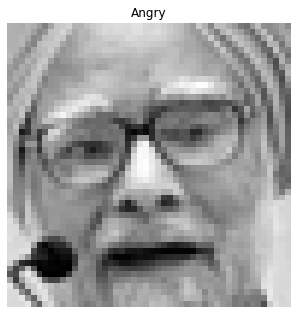

In [13]:
plt.figure(figsize=[24,24])
plt.subplot(4,4,2)
plt.imshow(X_train[1],cmap="gray")
plt.title(emotions[y_train1[1]])
plt.axis("off")
plt.show()

In [14]:
datagen = ImageDataGenerator(rotation_range=10, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True) 

In [33]:
history = model.fit(datagen.flow(X_train, y_train, 
                                 batch_size=32),
                    validation_data=(X_test, y_test),
                    steps_per_epoch=X_train.shape[0] // 32, 
                    epochs=500)

Epoch 1/500
897/897 [==============================] - 16s 17ms/step - loss: 1.2977 - accuracy: 0.5040 - val_loss: 1.1636 - val_accuracy: 0.5517
Epoch 2/500
897/897 [==============================] - 15s 17ms/step - loss: 1.2819 - accuracy: 0.5145 - val_loss: 1.1677 - val_accuracy: 0.5500
Epoch 3/500
897/897 [==============================] - 15s 17ms/step - loss: 1.2662 - accuracy: 0.5164 - val_loss: 1.1529 - val_accuracy: 0.5653
Epoch 4/500
897/897 [==============================] - 15s 17ms/step - loss: 1.2443 - accuracy: 0.5269 - val_loss: 1.1348 - val_accuracy: 0.5545
Epoch 5/500
897/897 [==============================] - 15s 17ms/step - loss: 1.2302 - accuracy: 0.5330 - val_loss: 1.1078 - val_accuracy: 0.5662
Epoch 6/500
897/897 [==============================] - 16s 17ms/step - loss: 1.2161 - accuracy: 0.5391 - val_loss: 1.0874 - val_accuracy: 0.5784
Epoch 7/500
897/897 [==============================] - 15s 17ms/step - loss: 1.2029 - accuracy: 0.5439 - val_loss: 1.0832 - val_ac

In [34]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Потери на тесте train:', train_score[0])
print('Точность на тесте train:', train_score[1])
print('\n')
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Потери на тесте train:', test_score[0])
print('Точность на тесте train:', test_score[1])
print('\n')
val_score = model.evaluate(X_val, y_val, verbose=0)
print('Потери на тесте val:', val_score[0])
print('Точность на тесте val:', val_score[1])

Потери на тесте train: 0.2836776375770569
Точность на тесте train: 0.9049426913261414


Потери на тесте train: 1.0273948907852173
Точность на тесте train: 0.6723321080207825


Потери на тесте val: 0.9558681845664978
Точность на тесте val: 0.6884925961494446


In [35]:
pred_test_labels = model.predict(X_test)

113/113 [==============================] - 1s 4ms/step


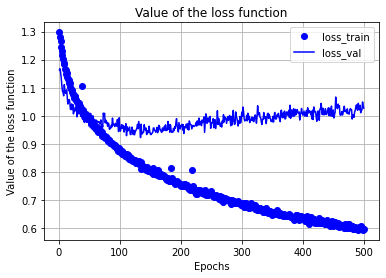

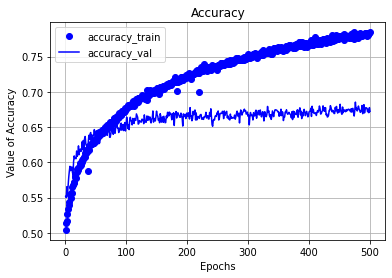

In [36]:
loss     = history.history['loss']
loss_val = history.history['val_loss']
epochs   = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc     = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs  = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

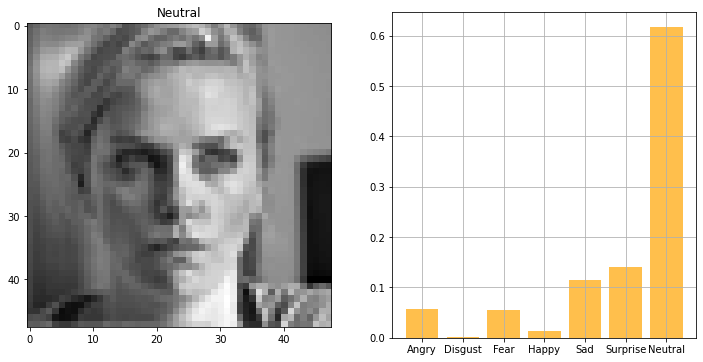

In [37]:
plot_image_and_emotion(X_test, y_test1, pred_test_labels, 420)

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


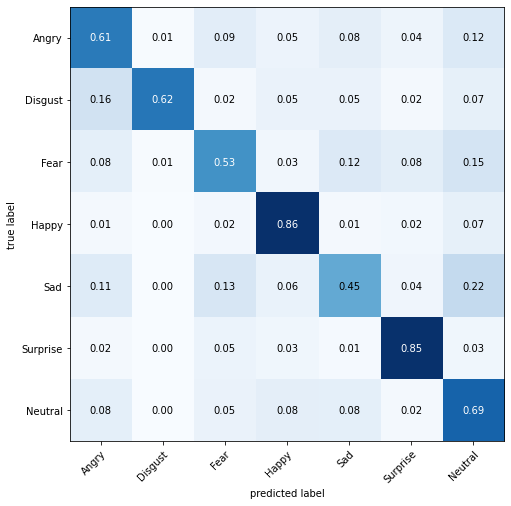

In [38]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

In [75]:
resnet = Sequential()

resnet.add(ResNet50(include_top=False, weights='imagenet', input_shape=(48, 48, 3)))
resnet.add(Flatten())
resnet.add(Dense(7, activation='softmax'))

In [76]:
resnet.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [77]:
resnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 7)                 57351     
                                                                 
Total params: 23,645,063
Trainable params: 23,591,943
Non-trainable params: 53,120
_________________________________________________________________


In [78]:
res_history = resnet.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=200,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64,
                         validation_split = 0.25)

Epoch 1/200
448/448 [==============================] - 26s 49ms/step - loss: 2.4824 - accuracy: 0.2417 - val_loss: 5.1639 - val_accuracy: 0.2120
Epoch 2/200
448/448 [==============================] - 22s 49ms/step - loss: 1.8876 - accuracy: 0.2527 - val_loss: 1.8262 - val_accuracy: 0.2505
Epoch 3/200
448/448 [==============================] - 22s 48ms/step - loss: 1.8169 - accuracy: 0.2800 - val_loss: 1.9221 - val_accuracy: 0.2502
Epoch 4/200
448/448 [==============================] - 21s 48ms/step - loss: 1.6621 - accuracy: 0.3471 - val_loss: 1.5416 - val_accuracy: 0.4157
Epoch 5/200
448/448 [==============================] - 21s 48ms/step - loss: 1.5875 - accuracy: 0.3834 - val_loss: 2.1376 - val_accuracy: 0.2282
Epoch 6/200
448/448 [==============================] - 21s 48ms/step - loss: 1.5411 - accuracy: 0.3987 - val_loss: 1.4567 - val_accuracy: 0.4394
Epoch 7/200
448/448 [==============================] - 21s 48ms/step - loss: 1.4593 - accuracy: 0.4339 - val_loss: 1.9411 - val_ac

In [79]:
train_score = resnet.evaluate(X_train_res, y_train, verbose=0)
print('Потери на тесте train:', train_score[0])
print('Точность на тесте train:', train_score[1])
print('\n')
test_score = resnet.evaluate(X_test_res, y_test, verbose=0)
print('Потери на тесте train:', test_score[0])
print('Точность на тесте train:', test_score[1])
print('\n')
val_score = resnet.evaluate(X_val_res, y_val, verbose=0)
print('Потери на тесте val:', val_score[0])
print('Точность на тесте val:', val_score[1])

Потери на тесте train: 0.9180322885513306
Точность на тесте train: 0.6616044044494629


Потери на тесте train: 1.118658423423767
Точность на тесте train: 0.5965449810028076


Потери на тесте val: 1.0748080015182495
Точность на тесте val: 0.6057397723197937


In [80]:
pred_test_labels = resnet.predict(X_test_res)

113/113 [==============================] - 2s 14ms/step


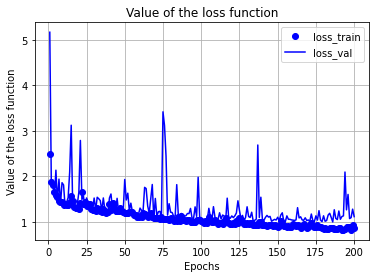

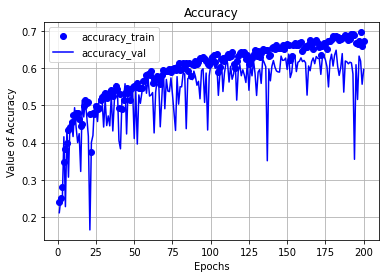

In [81]:
loss = res_history.history['loss']
loss_val = res_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = res_history.history['accuracy']
acc_val = res_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

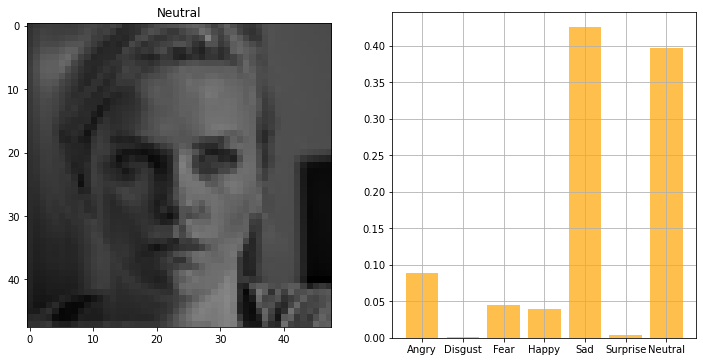

In [82]:
plot_image_and_emotion(res_X_test, y_test1, pred_test_labels, 420)

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


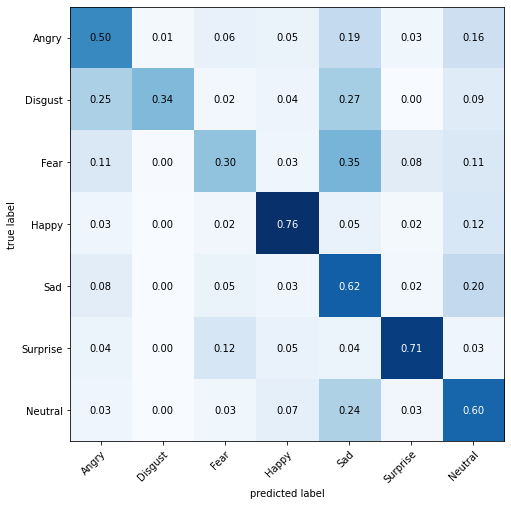

In [83]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

**Выводы**

**1. Обоснование выбора генератора для аугментации данных**

Был выбран Keras генератор по простой причине: для построения модели использовался фреймворк Keras+Tensorflow2.0, что предполагало использование Keras генератора. Так же я провел тест (см. gpu_test_gen), где создал 2 похожих генератора: Keras и PyТorch. После обучения 2 идентичных моделей, метрики были лучше у Keras генератора(точность: 0.62 против 0.57; потери: 1.06 против 2.24).

**2. Обоснование выбора бэкбон архитектуры типа ResNet, EfficientNet, Inception, GoogleNet, etc для обучения классификатора**

На сайте Keras (https://keras.io/api/applications/) я выбрал 8 наиболее, на мой взгляд, перспективных моделей и обучил их распозновать эмоции (см. gpu_test_net). После этого я сравнил полученные результаты и выбрал ту модель, у которой они были лучше. Была выбрана модель ResNet50 с точность 0.61.

**3. Сравнение результатов с текущими актуальными моделями**

Метрики на моей модели получились следующие: точность и потери составили 0.69 и 0.95 соответственно. Изучив модели другиих людей, я обнаружил, что чаще всего точность не превышает 0.6. Лучший показатель был 0.71.

**4. Варианты улучшения метрик точности результатов**

- Разделить данные по возрасту человека.
- Разделить по полу.
- Разделить по ракурсу (вид спереди, вид сбоку, т.д.).
- Отделить от основого датасета людей с болезнями, очками, бородой и т.д.
- Увеличить размер датасета. 
- Дополнительно валидировать датасет (см. примеры неточных разметок данных ниже).

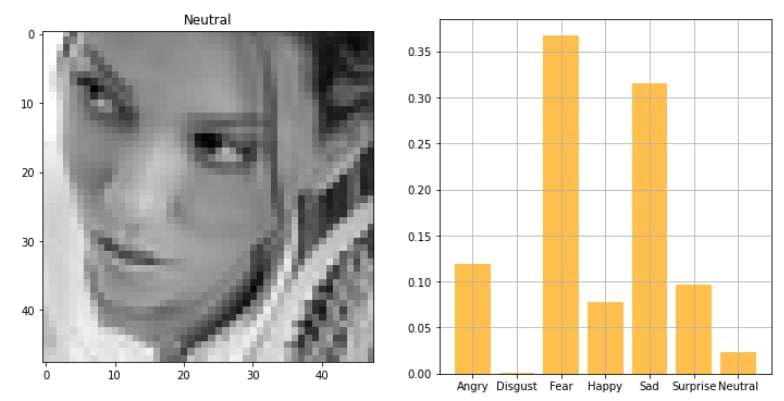

In [19]:
from IPython.display import Image 
Image('C:\\Users\\plato\\Downloads\\image_1.png')

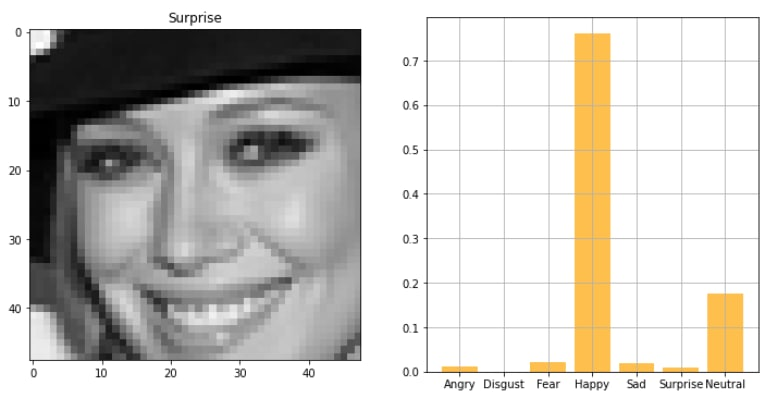

In [20]:
Image('C:\\Users\\plato\\Downloads\\image_2.png')

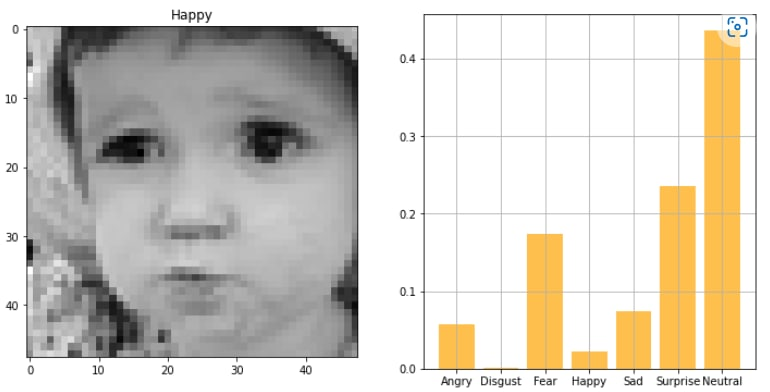

In [21]:
Image('C:\\Users\\plato\\Downloads\\image_3.png')